In [8]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt


The Hull-White model, as extended from the Vasicek model, represents a significant development in the modeling of interest rates. The model you've described is particularly notable for its ability to fit the current term structure of interest rates accurately, a crucial aspect for practical applications in finance.

Let's break down the key components and the implications of this model:

### 1. Model Formulation

The Hull-White model is given by:

$$ dr(t) = [\vartheta(t) - a r(t)] dt + \sigma dW(t) $$

Here, $ a $ and $ \sigma$  are constants representing the speed of mean reversion and the volatility, respectively. The function $ \vartheta(t) $ is designed to fit the current term structure of interest rates.

### 2. Fitting the Term Structure

The function $ \vartheta(t) $ is determined using the market instantaneous forward rate $ f^M(0, T) $, defined as:

$$ f^M(0, T) = -\frac{\partial \ln P^M(0, T)}{\partial T} $$

where $ P^M(0, T) $ is the market discount factor for maturity $ T $. Thus, $ \vartheta(t) $ is given by:

$$ \vartheta(t) = \frac{\partial f^M(0, t)}{\partial T} + a f^M(0, t) + \frac{\sigma^2}{2a}(1 - e^{-2at}) $$

### 3. Integration and the Short Rate $r(t)$

Upon integrating the model, we obtain an expression for $ r(t) $:

$$ r(t) = r(s)e^{-a(t-s)} + \int_s^t e^{-a(t-u)} \vartheta(u) du + \sigma \int_s^t e^{-a(t-u)} dW(u) $$

This can be further expressed using $ \alpha(t) $:

$$ r(t) = r(s)e^{-a(t-s)} + \alpha(t) - \alpha(s)e^{-a(t-s)} + \sigma \int_s^t e^{-a(t-u)} dW(u) $$

where:

$$ \alpha(t) = f^M(0, t) + \frac{\sigma^2}{2a^2}(1 - e^{-at})^2 $$

### 4. Mean and Variance of $ r(t) $

Given the model's formulation, the mean and variance of $ r(t) $ conditional on $ \mathcal{F}_s $ are:

- **Mean:** $ E\{r(t) | \mathcal{F}_s\} = r(s)e^{-a(t-s)} + \alpha(t) - \alpha(s)e^{-a(t-s)} $
- **Variance:** $ \text{Var}\{r(t) | \mathcal{F}_s\} = \frac{\sigma^2}{2a}[1 - e^{-2a(t-s)}] $

### 5. Practical Application and Implications

- **Calibration:** The model parameters $ a $ and $\sigma $, along with the term structure fitting through $ \vartheta(t) $, need to be calibrated to market data.
- **Path Simulation:** For pricing interest rate derivatives or risk management, simulate the paths of $r(t)$ using these formulas.
- **Analytical and Numerical Methods:** The model allows for some analytical solutions for certain derivatives but generally requires numerical methods, especially for path-dependent options.

### Conclusion

The Hull-White model's ability to fit the current term structure of interest rates makes it highly valuable for financial modeling and derivative pricing. The model requires careful calibration and understanding of its dynamics, particularly in how it models the mean reversion and volatility of interest rates. Your background in mathematical finance provides a solid foundation for delving into these complexities and applying the model effectively.

In [14]:
%store -r 

If you have a list of zero-coupon (ZC) bond values, and you wish to use these to update the functions `fM` (the market instantaneous forward rate) and `theta` (the Hull-White model parameter).

The market instantaneous forward rate $ f^M(0, T) $ can be derived from the zero-coupon bond prices. In theory, the relationship between the zero-coupon bond price $ P^M(0, T) $ and the forward rate is given by:

$$ P^M(0, T) = \exp(-T \cdot f^M(0, T)) $$

However, for practical purposes, we often work with the continuously compounded yield, defined as:

$$ f^M(0, T) = -\frac{1}{T} \ln(P^M(0, T)) $$

Given a list `ZCValues` representing the prices of zero-coupon bonds at different maturities, the corresponding maturities would also be needed. Assuming you have a list `maturities` that aligns with `ZCValues`, here's how you can modify the functions:


In [15]:
from scipy.interpolate import interp1d

def fM(T, ZCValues, maturities):
    # Calculate forward rates from ZC bond prices
    forward_rates = -np.log(ZCValues) / maturities

    # Create an interpolation function
    fM_interpolate = interp1d(maturities, forward_rates, fill_value="extrapolate")

    return fM_interpolate(T)


In [25]:
def theta(t, a, sigma, ZCValues):
    # Derivative of fM with respect to T
    # This might be approximated numerically or derived analytically if possible
    # Here, a simple numerical derivative approach is shown as an example
    dt = 0.0001  # small time step for numerical derivative
    dfM_dT = (fM(t + dt, ZCValues[:,1], ZCValues[:,0]) - fM(t, ZCValues[:,1], ZCValues[:,0])) / dt

    return dfM_dT + a * fM(t, ZCValues[:,1], ZCValues[:,0]) + (sigma**2) / (2 * a) * (1 - np.exp(-2 * a * t))



In [26]:
def simulate_r(timesteps, r0, a, sigma, delta_t, ZCValues):
    r = np.zeros(timesteps)
    r[0] = r0  # initial short rate

    for t in range(1, timesteps):
        dw = np.random.normal(0, np.sqrt(delta_t))  # Wiener process increment
        r[t] = r[t - 1] + (theta(t * delta_t, a, sigma,  ZCValues) - a * r[t - 1]) * delta_t + sigma * dw

    return r


In [27]:
# Example parameters
a = 0.1
sigma = 0.02
r0 = 0.05  # initial short rate
timesteps = 1000
delta_t = 1/252  # daily time steps, assuming 252 trading days in a year

# Simulate interest rate paths
interest_rate_paths = simulate_r(timesteps, r0, a, sigma, delta_t, ZCValues)

# The 'interest_rate_paths' array contains the simulated path of interest rates


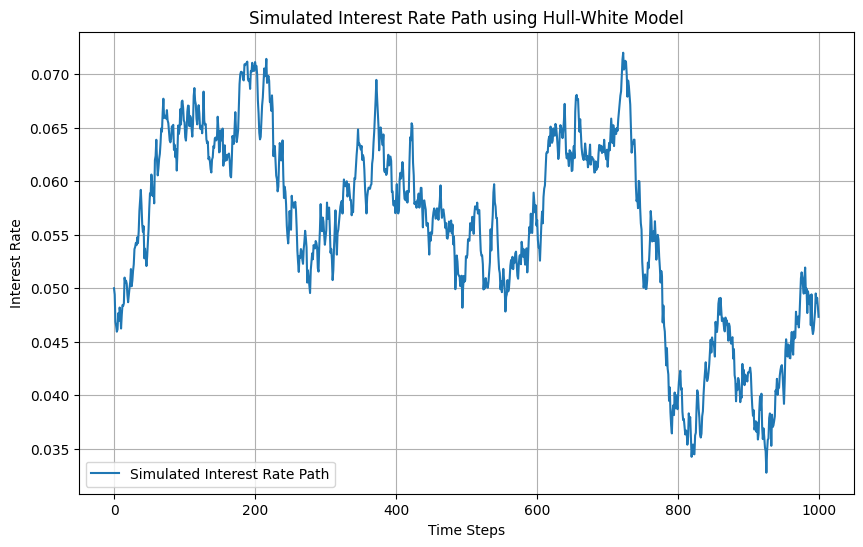

In [28]:
# Plotting the path
plt.figure(figsize=(10, 6))
plt.plot(interest_rate_paths, label='Simulated Interest Rate Path')
plt.xlabel('Time Steps')
plt.ylabel('Interest Rate')
plt.title('Simulated Interest Rate Path using Hull-White Model')
plt.legend()
plt.grid(True)
plt.show()
